In [1]:
import numpy as np
import os 
import pandas as pd
import glob
import itertools
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import scipy
from scipy.stats import norm
from IPython.display import display, Math

path = os.getcwd()
print(path)

C:\Users\smunoz-ext\Beca


### Archivo

Datos del test inicial (el que se hizo antes de que yo llegara), para ponerlo bien, porque tiene las horas mal

In [220]:
# Array con los nombres de los arhivos ordenados por fecha de creación
files = glob.glob1(path,"*.csv")
files.sort(key=lambda x: os.path.getmtime(x))
files = [str(x) for x in files]

# Archivos
df0 = pd.read_csv(files[0])
df1 = pd.read_csv(files[1])
df1 = df1.drop(df1.index[0:2])
df2 = pd.read_csv(files[2])
df2 = df2.drop(df2.index[0:2])

# Se saca la hora final del archivo 1 y la hora inicial archivo 2
date1 = df1.loc[df1.index[-1],'Date/Time']
hour1 = int(date1[11]+date1[12])+int(date1[14]+date1[15])/60+int(date1[17]+date1[18])/3600

date2 = df2['Date/Time'][2]
hour2 = int(date2[11]+date2[12])+int(date2[14]+date2[15])/60+int(date2[17]+date2[18])/3600

final_hour = df1.loc[df1.index[-1],' Hours after Start']
# En la columna de hora, el archivo 2 necesita que se le sume el cómputo final 
# del archivo 1 y el tiempo que pasó entre ambos


C:\Users\smunoz-ext\AppData\Local\Temp\ipykernel_5128\2813645962.py:10: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv(files[2])


In [221]:
# Se pasa a int los valores de la columna para poder sumarlos
df2.loc[:,' Hours after Start'] = [float(x) for x in df2.loc[2:,' Hours after Start']]

display(df2.loc[:,' Hours after Start'])

# Se crea columna pandas con las horas que hay que añadir
hour_list = (np.ones(len(df2)+2)*(float(final_hour)+(hour2-hour1))).tolist()
hours = pd.DataFrame({" Hours after Start":hour_list})

display(hours.loc[:,' Hours after Start'])

2          0.006447
3          0.009431
4          0.012432
5          0.015329
6          0.018220
            ...    
39345    120.957969
39346    120.961414
39347    120.964853
39348    120.968446
39349    120.972036
Name:  Hours after Start, Length: 39348, dtype: float64

0        69.289709
1        69.289709
2        69.289709
3        69.289709
4        69.289709
           ...    
39345    69.289709
39346    69.289709
39347    69.289709
39348    69.289709
39349    69.289709
Name:  Hours after Start, Length: 39350, dtype: float64

#### ¡¡No ejecutar repetidamente!! Hay que reiniar la kernel antes

Si no es que se van añadiendo las horas cada vez que se ejecuta la celda

In [222]:
# Se añaden las horas 
df2.loc[:,' Hours after Start'] = df2.loc[:,' Hours after Start']+hours.loc[:,' Hours after Start']

display(df2.loc[:,' Hours after Start'])

2         69.296156
3         69.299140
4         69.302141
5         69.305038
6         69.307929
            ...    
39345    190.247678
39346    190.251123
39347    190.254562
39348    190.258155
39349    190.261745
Name:  Hours after Start, Length: 39348, dtype: float64

In [223]:
# Se concatenan los tres archivos 
# (habiendo ya eliminado las filas 1 y 2 de los dos últimos archivos)

df = pd.DataFrame(np.concatenate((df0.values,df1.values,df2.values)),columns=df.columns) 
display(df)

,Date/Time,Note,Hours after Start,50 mK FAA Temperature,50 mK FAA Resistance,1 K GGG Temperature,1 K GGG Resistance,50 K Stage Diode,3 K Stage Diode,Magnet Diode,...,LS372 Ch. 4,LS372 Ch. 4 R,LS372 Ch. 5,LS372 Ch. 5 R,LS372 Ch. 6,LS372 Ch. 6 R,LS372 Ch. 7,LS372 Ch. 7 R,LS372 Ch. 8,LS372 Ch. 8 R
0,NaN,,Hours,K,Ohms,K,Ohms,K,K,K,...,K,Ohms,K,Ohms,K,Ohms,K,Ohms,K,Ohms
1,NaN,,,,,,,,,,...,LS372 Ch. 4,LS372 Ch. 4 R,LS372 Ch. 5,LS372 Ch. 5 R,LS372 Ch. 6,LS372 Ch. 6 R,LS372 Ch. 7,LS372 Ch. 7 R,LS372 Ch. 8,LS372 Ch. 8 R
2,05/09/2022 16:13:50,NaN,0.015145,293.818000,1004.900000,291.383000,1000.500000,295.530000,295.320000,295.260000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,05/09/2022 16:14:01,NaN,0.018071,293.834000,1004.890000,289.582000,1000.800000,295.530000,295.320000,295.250000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,05/09/2022 16:14:11,NaN,0.020982,293.695000,1004.920000,289.969000,1000.700000,295.530000,295.310000,295.250000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61476,05/17/2022 14:27:24,NaN,190.247678,284.545,1006.43,284.878,1001.5,280.8,263.6,261.69,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
61477,05/17/2022 14:27:36,NaN,190.251123,284.591,1006.42,286.687,1001.2,280.8,263.61,261.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
61478,05/17/2022 14:27:49,NaN,190.254562,284.608,1006.42,284.331,1001.5,280.81,263.62,261.71,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
61479,05/17/2022 14:28:02,NaN,190.258155,284.698,1006.4,288.024,1001.0,280.81,263.63,261.72,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [224]:
df.to_csv('Test_Initial_Cryo.csv',index=False)

### Gráfico general

Para comprobar

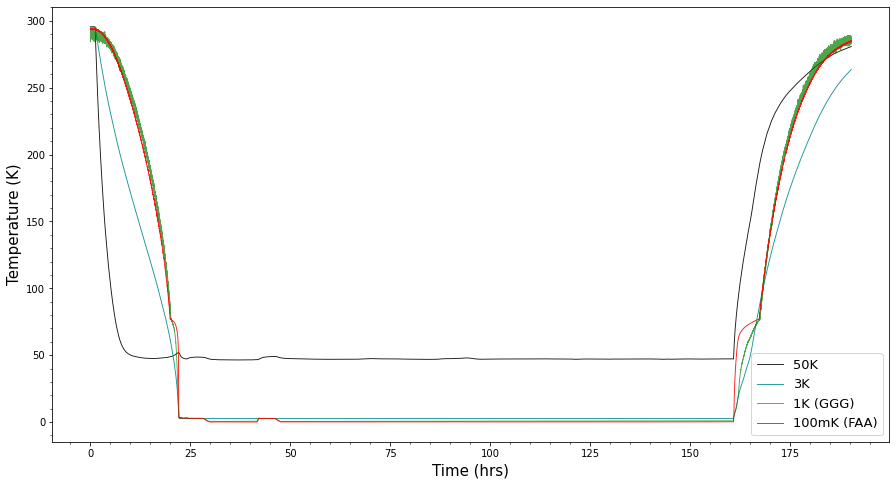

In [228]:
#df = pd.read_csv(path+'\Datos\PruebaCryo-Initial\Test_Initial_Cryo.csv')

temp_50K = np.array(df.iloc[2:,7]).astype(float)
temp_3K = np.array(df.iloc[2:,8]).astype(float)
temp_GGG = np.array(df.iloc[2:,5]).astype(float)
temp_FAA = np.array(df.iloc[2:,3]).astype(float)
time = np.array(df.iloc[2:,2]).astype(float)

plt.rcParams.update({'axes.labelsize': 15, 'axes.titlesize': 15, 
              'legend.fontsize':13, 'font.family': ['sans-serif'] })

index = np.where(temp_GGG < 0.001)

temp_GGG_remove = np.delete(temp_GGG,index)
time_remove = np.delete(time,index)


i=0     # Fila inicial

fig, ax = plt.subplots(figsize=(15, 8))

plt.plot(time[i:],temp_50K[i:], color='black', alpha=0.9, linewidth=0.9, label='50K')
plt.plot(time[i:],temp_3K[i:], color='darkcyan', alpha=0.9, linewidth=0.9, label='3K')
plt.plot(time_remove[i:],temp_GGG_remove[i:], color='green', alpha=0.7, linewidth=0.9, label='1K (GGG)')  
plt.plot(time[i:],temp_FAA[i:], color='red', alpha=0.9, linewidth=0.9, label='100mK (FAA)')  

plt.minorticks_on()  
plt.xlabel('Time (hrs)')
plt.ylabel('Temperature (K)')
plt.legend()
plt.show()

### Estabilidades

In [2]:
df = pd.read_csv(path+'\Datos\PruebaCryo-Initial\Test_Initial_Cryo.csv')

temp_50K = np.array(df.iloc[2:,7]).astype(float)
temp_3K = np.array(df.iloc[2:,8]).astype(float)
temp_GGG = np.array(df.iloc[2:,5]).astype(float)
temp_FAA = np.array(df.iloc[2:,3]).astype(float)
time = np.array(df.iloc[2:,2]).astype(float)


# Se eliminan los valores 0 del sensor de 1K
index = np.where(temp_GGG < 0.001)
temp_GGG_remove = np.delete(temp_GGG,index)
time_remove = np.delete(time,index)

# Se eliminan los valores 0 del sensor de FAA
index2 = np.where(temp_FAA < 0.028)
temp_FAA_remove = np.delete(temp_FAA,index2)


C:\Users\smunoz-ext\AppData\Local\Temp\ipykernel_26940\2009212481.py:1: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path+'\Datos\PruebaCryo-Initial\Test_Initial_Cryo.csv')


In [34]:
i, j = 9547, 13197
print(temp_GGG[i:j], temp_GGG[i:j].shape)

i, j = 9546, 13196
print(temp_GGG_remove[i:j], temp_GGG_remove[i:j].shape, np.mean(temp_GGG_remove[i:j]))


[0.485711 0.485774 0.485822 ... 0.527752 0.527769 0.527772] (3650,)
[0.485711 0.485774 0.485822 ... 0.527752 0.527769 0.527772] (3650,) 0.5067074383561644


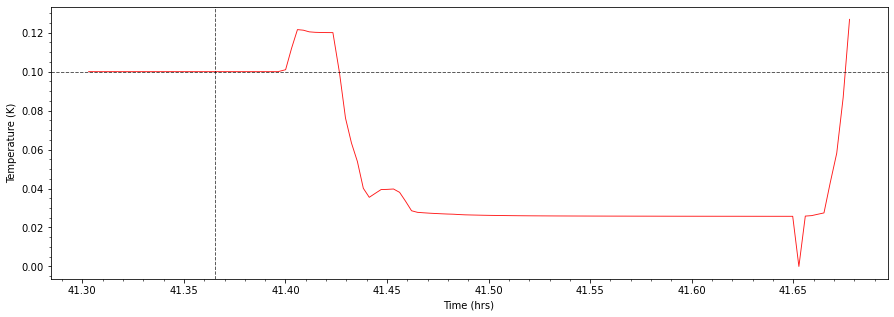

In [58]:

fig, ax = plt.subplots(figsize=(15,5))

i, j = 13200, 13325
k1 = 9547
k2 = 13220

plt.plot(time[i:j],temp_FAA[i:j], color='red', alpha=0.9, linewidth=0.9, label='100mK (FAA)')  
plt.axvline(time[k2], ymin=0, ymax=3, color='black', alpha=0.7, linewidth=0.9, linestyle='--')
#plt.axvline(time[k1], ymin=0, ymax=3, color='black', alpha=0.7, linewidth=0.9, linestyle='--')
plt.axhline(y=0.1, color='black', alpha=0.7, linewidth=0.9, linestyle='--')
plt.minorticks_on()
#plt.ylim(0.095,0.105)
plt.xlabel('Time (hrs)')
plt.ylabel('Temperature (K)')


plt.show()

In [6]:

k1 = 9547
k2 = 13197  # 13220 (41,37 hrs) # 13313 (41,64 hrs)

k1_FAA, k2_FAA = 9467, 13117

print(time[k1],time[k2])
time_ = time[k1_FAA:k2_FAA]
time_FAA = time[k1:k2]
temp_FAA_ = temp_FAA_remove[k1_FAA:k2_FAA]
temp_GGG_ = temp_GGG_remove[k1:k2]
temp_3K_ = temp_3K[k1:k2]
temp_50K_ = temp_50K[k1:k2]


mu_FAA, sigma_FAA = scipy.stats.norm.fit(temp_FAA_)
mu_GGG, sigma_GGG = scipy.stats.norm.fit(temp_GGG_)
mu_3K, sigma_3K = scipy.stats.norm.fit(temp_3K_)
mu_50K, sigma_50K = scipy.stats.norm.fit(temp_50K_)



data = {'Cycle':        ['First','First','First','First'],
        'Stage': ['FAA',   'GGG',  '3K',  '50K'],
        'Temperature (K)':    [mu_FAA, mu_GGG, mu_3K, mu_50K],
        'Stability (K)':[sigma_FAA, sigma_GGG, sigma_3K, sigma_50K]}

table = pd.DataFrame(data)
table['Temperature (K)'] = table['Temperature (K)']
table['Stability (K)'] = table['Stability (K)']
table = table.pivot_table(values= ['Temperature (K)','Stability (K)'],
                  index=['Cycle', 'Stage'])
display(table)

display(Math(r'$\mu: {}\, k \\ \sigma: {} \, k$'.format(mu_FAA, sigma_FAA)))

30.083003 41.293804


Stability (K)  Temperature (K)
Cycle Stage                                
First 3K          0.016933         2.648690
      50K         0.119131        46.525708
      FAA         0.000005         0.100000
      GGG         0.012171         0.506719

<IPython.core.display.Math object>

#### Estabilidad etapa de 50K a trozos

In [12]:
n = 12  # El rango es de 3650 muestras, si lo divido en 12 tienen 304 cada uno aprox (en 11 tendrán 332)

t = np.array_split(time_FAA,n)
T = np.array_split(temp_FAA_,n)

for i in range(n):
    mu, sigma = scipy.stats.norm.fit(T[i])
    
    print('Inicio (hrs):',t[i][0])
    print(np.round(mu*1000,3), np.round(sigma*1000000,2))
    print()

Inicio (hrs): 30.083003
100.0 4.13

Inicio (hrs): 31.003829
100.0 3.55

Inicio (hrs): 31.927867
100.0 3.85

Inicio (hrs): 32.85154
100.0 4.16

Inicio (hrs): 33.778491
100.0 4.43

Inicio (hrs): 34.709486
100.0 3.56

Inicio (hrs): 35.639035
100.0 4.11

Inicio (hrs): 36.572023
100.0 3.93

Inicio (hrs): 37.508609
100.0 3.85

Inicio (hrs): 38.449653
100.0 3.73

Inicio (hrs): 39.394343
100.0 3.92

Inicio (hrs): 40.342207
99.999 8.77

